**Nama**    : Yona Ade Hermawan\
**Kelas**   : PYTN-KS09\
**Absensi** : 008

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Read CSV

In [13]:
df = pd.read_csv('dataset/bank.csv', delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Exploratory & Cleaning Data

Mengetahui bentuk data

In [5]:
df.shape

(4521, 17)

Dataset ini memiliki 4521 baris data dan 17 kolom.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [7]:
obj_list = df.columns[df.dtypes == 'object'].to_list()
for col in obj_list:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        4521 non-null   int64   
 1   job        4521 non-null   category
 2   marital    4521 non-null   category
 3   education  4521 non-null   category
 4   default    4521 non-null   category
 5   balance    4521 non-null   int64   
 6   housing    4521 non-null   category
 7   loan       4521 non-null   category
 8   contact    4521 non-null   category
 9   day        4521 non-null   int64   
 10  month      4521 non-null   category
 11  duration   4521 non-null   int64   
 12  campaign   4521 non-null   int64   
 13  pdays      4521 non-null   int64   
 14  previous   4521 non-null   int64   
 15  poutcome   4521 non-null   category
 16  y          4521 non-null   category
dtypes: category(10), int64(7)
memory usage: 293.4 KB


In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Tidak ada missing data atau data null pada dataframe

In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


Sebaran data pada tiap kolom dinilai wajar.

# Visualization & Analysis Data

## Analysis by Job

**Visualization**

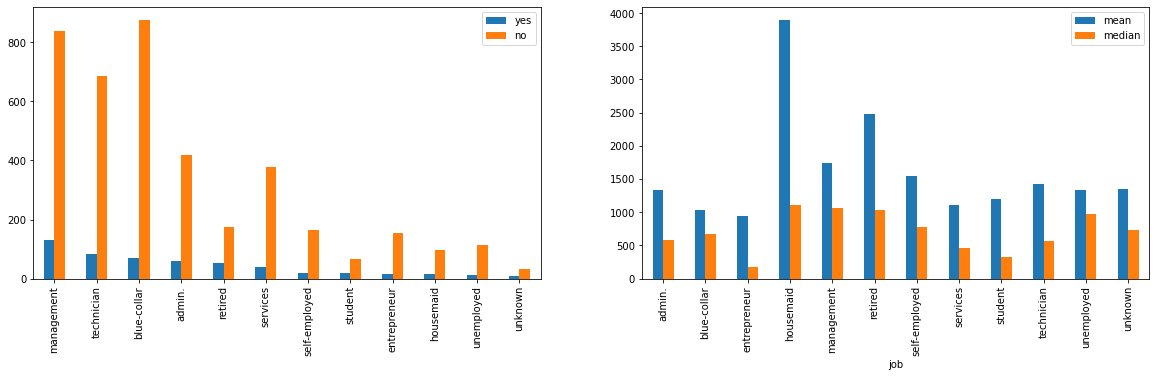

In [10]:
fig = plt.figure()
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

job_deposit = pd.DataFrame()
job_deposit['yes'] = df[df['y'] == 'yes']['job'].value_counts()
job_deposit['no'] = df[df['y'] == 'no']['job'].value_counts()
job_deposit.plot(kind='bar', ax=ax0)

job_balance = df[df['y'] == 'yes']
job_balance = job_balance.pivot_table(
    index='job',
    values='balance',
    aggfunc=[np.mean, np.median]
)
job_balance.plot(kind='bar', ax=ax1, figsize=(20, 5))
plt.legend(['mean', 'median'])

**Interpretasi**

1. Bidang pekerjaan yang paling banyak diobservasi adalah management dan blue-collar
2. Semua pekerjaan memiliki tingkat penolakan jauh lebih tinggi daripada penerimaan tawaran.
3. Management yang paling banyak membuka deposit
4. Housemaid dan retired memiliki jumlah balance rata-rata dan median tertinggi untuk pekerjaan yang membuka deposit

## Analysis by Marital

**Visualization**

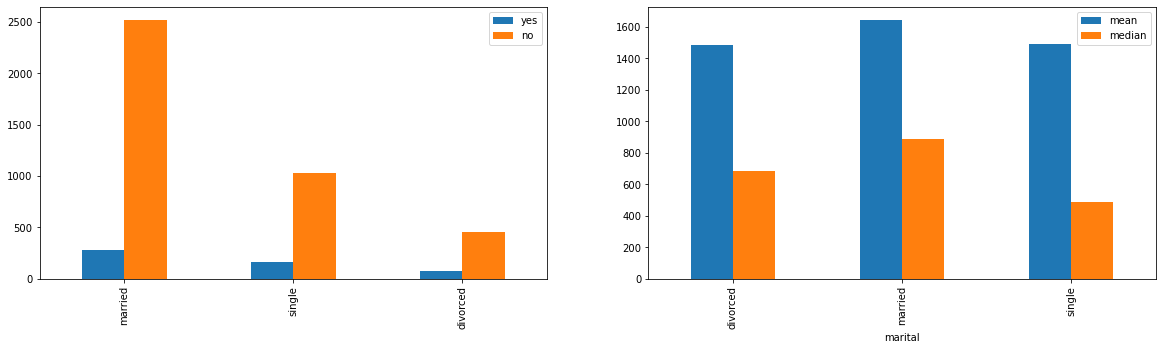

In [12]:
fig = plt.figure()
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

marital_deposit = pd.DataFrame()
marital_deposit['yes'] = df[df['y'] == 'yes']['marital'].value_counts()
marital_deposit['no'] = df[df['y'] == 'no']['marital'].value_counts()
marital_deposit.plot(kind='bar', ax=ax0)

marital_balance = df[df['y'] == 'yes']
marital_balance = marital_balance.pivot_table(
    index='marital',
    values='balance',
    aggfunc=[np.mean, np.median]
)
marital_balance.plot(kind='bar', ax=ax1, figsize=(20, 5))
plt.legend(['mean', 'median'])

 **Interpretasi**

1. Jumlah responden yang menikah paling banyak
2. Tingkat penolakan tawaran masih jauh lebih tinggi
3. Married lebih banyak yang membuka deposit
4. Balance married yang tertinggi, secara umum perbedaannya kecil

## Correlation

**Visualization**

Bagian ini digunakan untuk melihat korelasi antar kolom.

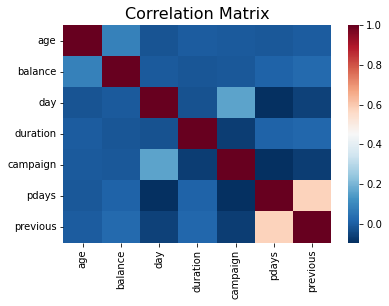

<Figure size 1440x1440 with 0 Axes>

In [23]:
corrmat = df.corr()
sns.heatmap(df[corrmat.index].corr(),cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.figure(figsize=(20, 20))
plt.show()

**Interpretasi**

Dari hasil visualisasi tidak ada data yang memiliki korelasi kuat sehingga tidak perlu adanya seleksi kolom

## Feature Engineering

In [28]:
df['contact'].describe()

count         4521
unique           3
top       cellular
freq          2896
Name: contact, dtype: object

In [25]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [35]:
# label Encoding
for col in ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']:
    df[col] = preprocessing.LabelEncoder().fit_transform(df[col])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,services,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,management,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,management,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,blue-collar,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [38]:
onehots = pd.get_dummies(df['job'])
df = df.join(onehots)
df = df.drop(columns = ['job'])

KeyError: 'job'

In [39]:
x = df.drop(columns = ['y'])
y = df['y']
x

,age,marital,education,default,balance,housing,loan,contact,day,month,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,30,1,0,0,1787,0,0,0,19,10,...,0,0,0,0,0,0,0,0,1,0
1,33,1,1,0,4789,1,1,0,11,8,...,0,0,0,0,0,1,0,0,0,0
2,35,2,2,0,1350,1,0,0,16,0,...,0,0,1,0,0,0,0,0,0,0
3,30,1,2,0,1476,1,1,2,3,6,...,0,0,1,0,0,0,0,0,0,0
4,59,1,1,0,0,1,0,2,5,8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,1,1,0,-333,1,0,0,30,5,...,0,0,0,0,0,1,0,0,0,0
4517,57,1,2,1,-3313,1,1,2,9,8,...,0,0,0,0,1,0,0,0,0,0
4518,57,1,1,0,295,0,0,0,19,1,...,0,0,0,0,0,0,0,1,0,0
4519,28,1,1,0,1137,0,0,0,6,3,...,0,0,0,0,0,0,0,0,0,0


# Classification Models

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Logistic Regression

**Model**

In [41]:
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

**Result**

In [42]:
print("Accuracy Score :",accuracy_score(y_test, pred_test),"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

Accuracy Score : 0.8894620486366986 

Confusion Matrix :
 [[1174   31]
 [ 119   33]] 

Classfication Report :
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1205
           1       0.52      0.22      0.31       152

    accuracy                           0.89      1357
   macro avg       0.71      0.60      0.62      1357
weighted avg       0.86      0.89      0.87      1357



## K-Nearest Neighbors

**Model**

In [43]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

**Result**

In [44]:
print("Accuracy Score :",accuracy_score(y_test, pred_test),"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

Accuracy Score : 0.8761974944731025 

Confusion Matrix :
 [[1155   50]
 [ 118   34]] 

Classfication Report :
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      1205
           1       0.40      0.22      0.29       152

    accuracy                           0.88      1357
   macro avg       0.66      0.59      0.61      1357
weighted avg       0.85      0.88      0.86      1357



## SVM

**Model**

In [45]:
model = svm.SVC()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

**Result**

In [46]:
print("Accuracy Score :",accuracy_score(y_test, pred_test),"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

Accuracy Score : 0.8872512896094326 

Confusion Matrix :
 [[1204    1]
 [ 152    0]] 

Classfication Report :
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      1205
           1       0.00      0.00      0.00       152

    accuracy                           0.89      1357
   macro avg       0.44      0.50      0.47      1357
weighted avg       0.79      0.89      0.83      1357



## Decision Tree

**Model**

In [47]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

**Result**

In [48]:
print("Accuracy Score :",accuracy_score(y_test, pred_test),"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

Accuracy Score : 0.8585114222549742 

Confusion Matrix :
 [[1108   97]
 [  95   57]] 

Classfication Report :
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1205
           1       0.37      0.38      0.37       152

    accuracy                           0.86      1357
   macro avg       0.65      0.65      0.65      1357
weighted avg       0.86      0.86      0.86      1357



## Random Forest

**Model**

In [49]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

**Result**

In [50]:
print("Accuracy Score :",accuracy_score(y_test, pred_test),"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

Accuracy Score : 0.894620486366986 

Confusion Matrix :
 [[1179   26]
 [ 117   35]] 

Classfication Report :
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1205
           1       0.57      0.23      0.33       152

    accuracy                           0.89      1357
   macro avg       0.74      0.60      0.64      1357
weighted avg       0.87      0.89      0.87      1357



## Naive Bayes

**Model**

In [51]:
model = GaussianNB()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

**Result**

In [52]:
print("Accuracy Score :",accuracy_score(y_test, pred_test),"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

Accuracy Score : 0.8061901252763449 

Confusion Matrix :
 [[1028  177]
 [  86   66]] 

Classfication Report :
               precision    recall  f1-score   support

           0       0.92      0.85      0.89      1205
           1       0.27      0.43      0.33       152

    accuracy                           0.81      1357
   macro avg       0.60      0.64      0.61      1357
weighted avg       0.85      0.81      0.82      1357



# Algorithm Analysis

Untuk mengembangkan Machine Learning untuk dataset ini, maka model algoritma yang dipilih adalah Random Forest dikarenakan dari classification reportnya ditunjukkan bahwa akurasinya paling tinggi dibandingkan model algoritma lainnya dengan nilai precision dari y_test dan y_pred paling kecil perbedaannya.